# Answer of question no. 1

In [ ]:
# Load the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

In [ ]:
salarydata_train = pd.read_csv("/content/SalaryData_Train(1).csv")
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
salarydata_test = pd.read_csv("/content/SalaryData_Test(1).csv")
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## EDA Process

In [ ]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
salarydata_test.shape

(15060, 14)

In [ ]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
salarydata_train.shape

(30161, 14)

In [ ]:
#Finding the special characters in the data frame 
salarydata_train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
#Finding the special characters in the data frame 
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
# find categorical variables

categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [ ]:
salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
# check missing values in categorical variables
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [ ]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [ ]:
salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [ ]:
salarydata_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
salarydata_train.occupation.unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
salarydata_train.occupation.value_counts()


 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
salarydata_train.native.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [ ]:
salarydata_train.native.value_counts()


 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [ ]:
for var in categorical:
    
    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [ ]:
# find numerical variables
numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [ ]:
# view the numerical variables
salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [ ]:
# check missing values in numerical variables
salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [ ]:
X = salarydata_train.drop(['Salary'], axis=1)
y = salarydata_train['Salary']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((21112, 13), (9049, 13))

In [ ]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [ ]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [ ]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [ ]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [ ]:
X_train[categorical].isnull().mean()


workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [ ]:
# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [ ]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

In [ ]:
X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()


workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce


In [ ]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape


(21112, 102)

In [ ]:
X_test.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_test.shape


(9049, 102)

In [ ]:
X_train.dtypes


age            int64
workclass_1    int64
workclass_2    int64
workclass_3    int64
workclass_4    int64
               ...  
native_36      int64
native_37      int64
native_38      int64
native_39      int64
native_40      int64
Length: 102, dtype: object

## Answer of question no. 2

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd

In [ ]:
forestfires = pd.read_csv('/content/forestfires.csv')
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA Process

In [ ]:
forestfires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forestfires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

print("Head:", forestfires.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [ ]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forestfires.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
forestfires.shape

(517, 31)

In [ ]:
forestfires.drop('monthaug',axis='columns', inplace=True)
forestfires.drop('monthdec',axis='columns', inplace=True)
forestfires.drop('monthfeb',axis='columns', inplace=True)
forestfires.drop('monthjan',axis='columns', inplace=True)
forestfires.drop('monthjul',axis='columns', inplace=True)
forestfires.drop('monthjun',axis='columns', inplace=True)
forestfires.drop('monthmar',axis='columns', inplace=True)
forestfires.drop('monthmay',axis='columns', inplace=True)
forestfires.drop('monthnov',axis='columns', inplace=True)
forestfires.drop('monthoct',axis='columns', inplace=True)
forestfires.drop('monthsep',axis='columns', inplace=True)
forestfires.drop('monthapr',axis='columns', inplace=True)
forestfires.drop('daysat',axis='columns', inplace=True)
forestfires.drop('daysun',axis='columns', inplace=True)
forestfires.drop('daythu',axis='columns', inplace=True)
forestfires.drop('daytue',axis='columns', inplace=True)
forestfires.drop('daywed',axis='columns', inplace=True)


In [ ]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  size_category  517 non-null    object 
dtypes: float64(8), int64(5), object(1)
memory usage: 56.7+ KB


In [ ]:
df=pd.get_dummies(forestfires,columns=['size_category'], drop_first=True)


In [ ]:
print(df.head())


   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  size_category_small  
0       0                    1  
1       0                    1  
2       0                    1  
3       0                    1  
4       0                    1  


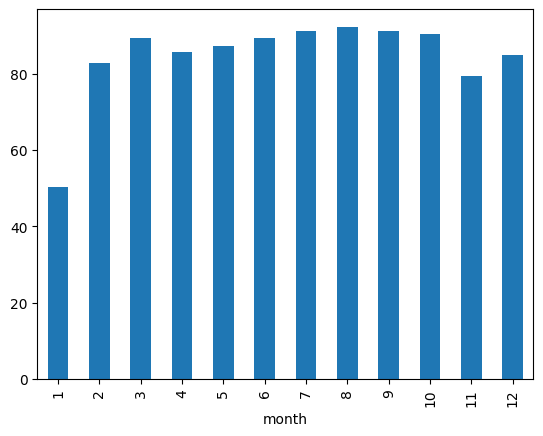

In [ ]:
# visualization to get the insights of dataset
forestfires.groupby('month').FFMC.mean().plot(kind='bar')
plt.show()

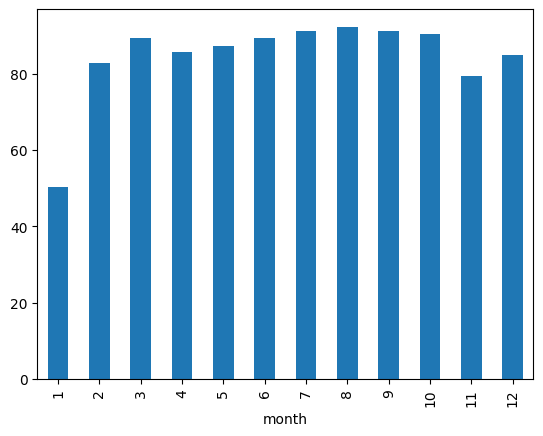

In [ ]:
forestfires.groupby('month').FFMC.mean().plot(kind='bar')
plt.show()

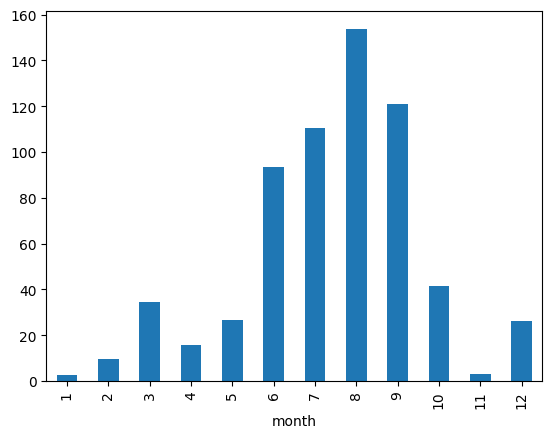

In [ ]:
forestfires.groupby('month').DMC.mean().plot(kind='bar')
plt.show()

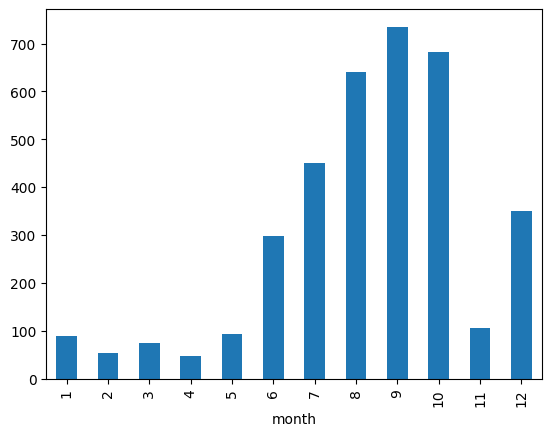

In [ ]:
forestfires.groupby('month').DC.mean().plot(kind='bar')
plt.show()

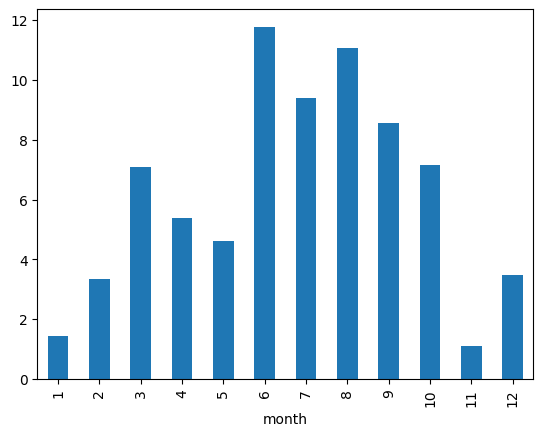

In [ ]:
forestfires.groupby('month').ISI.mean().plot(kind='bar')
plt.show()

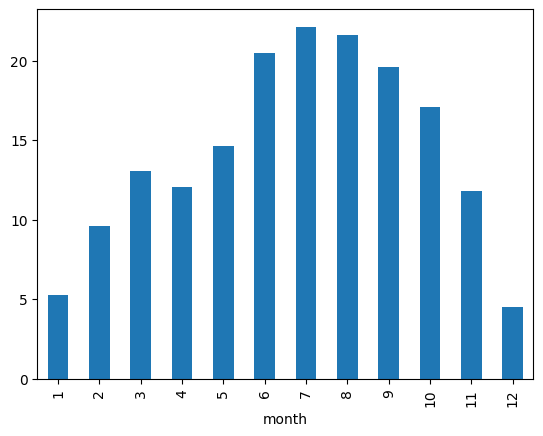

In [ ]:
forestfires.groupby('month').temp.mean().plot(kind='bar')
plt.show()

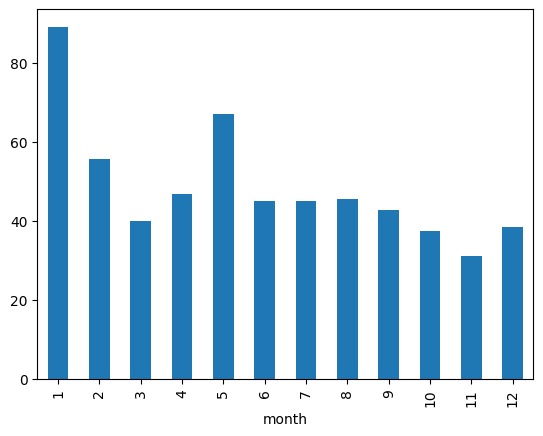

In [ ]:
forestfires.groupby('month').RH.mean().plot(kind='bar')
plt.show()

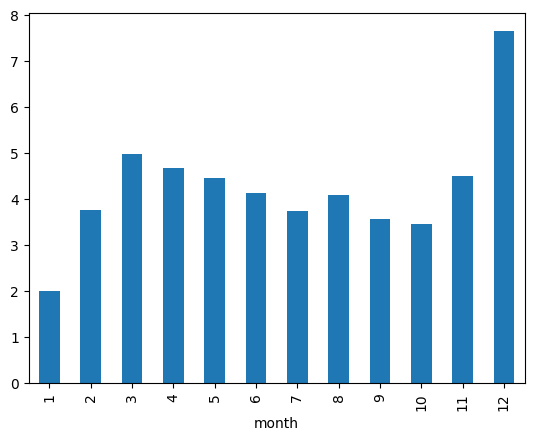

In [ ]:
forestfires.groupby('month').wind.mean().plot(kind='bar')
plt.show()

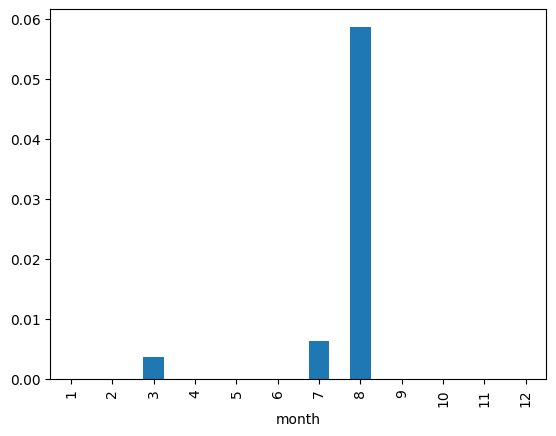

In [ ]:
forestfires.groupby('month').rain.mean().plot(kind='bar')
plt.show()

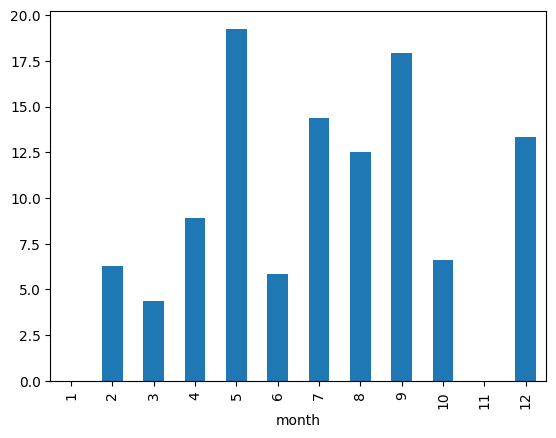

In [ ]:
forestfires.groupby('month').area.mean().plot(kind='bar')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = forestfires[['FFMC', 'DMC']]
Y = forestfires['month']
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC
# Declaring the SVC with no tunning
classifier = SVC()
# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)
# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)
print(score)

0.6442307692307693


<ipython-input-135-087102c67bc0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = forestfires.corr()


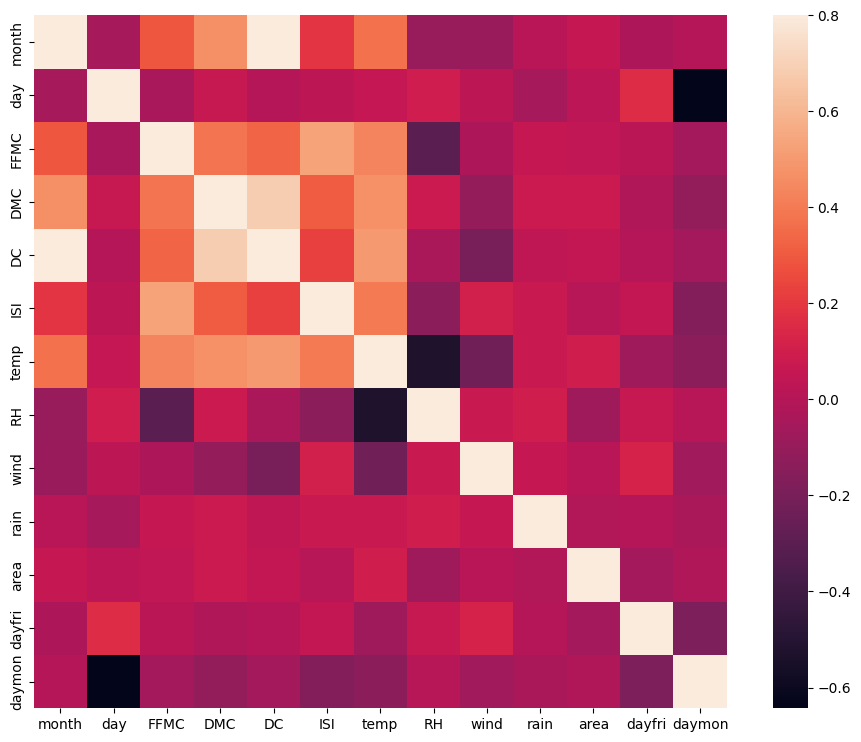

In [ ]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = forestfires.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

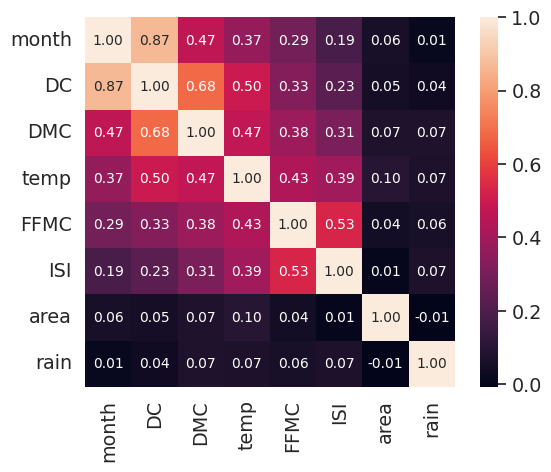

In [ ]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'month')['month'].index
cm = np.corrcoef(forestfires[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [ ]:
X = forestfires[['DC', 'ISI']]
Y = forestfires['month']
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Declaring the SVC with no tunning
classifier = SVC()
# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)
# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

In [ ]:
X = forestfires[['FFMC', 'DMC', 'DC', 'temp']]
Y = forestfires['month']
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Declaring the SVC with no tunning
classifier = SVC()
# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)
# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)
print(score)

0.7980769230769231


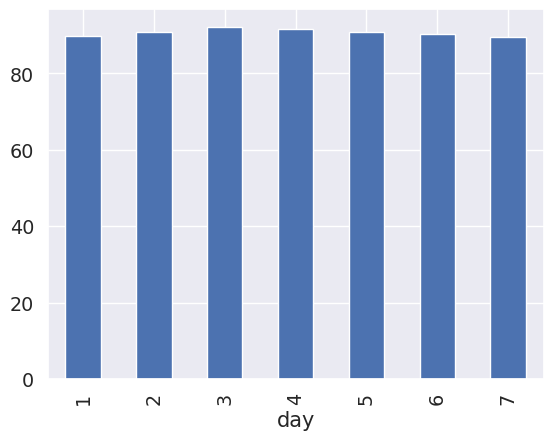

In [ ]:
# Mean below 20 years old
forestfires.groupby('day').FFMC.mean().plot(kind='bar')
plt.show()